## Introduction
Data visualisation with *Principal Component Analysis* (PCA), *t-distributed Stochastic Neighbor Embedding* (t-SNE), and *Autoencoders*. We will use the *scikit-learn* library to perform the analysis and *matplotlib* to visualise the results.

We will again use *Statlog/Satellite* dataset available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Landsat+Satellite%29).

## Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPRegressor
import umap

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn"
sat_data = pd.read_csv(url, header=None, delim_whitespace=True)

# Extract the features and target variable
X = sat_data.iloc[:, :-1].values
y = sat_data.iloc[:, -1].values

In [3]:
sat_data.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


## Data scaling
We will use the *StandardScaler* function from *scikit-learn* to scale the data. This will ensure that the data is centred around zero and has a standard deviation of one.

In [4]:
# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Principal Component Analysis
* We will use the *PCA* function from *scikit-learn* to perform the PCA analysis. We will use the *fit_transform* function to perform the analysis and transform the data. Remember that the *fit_transform* function performs the analysis and transforms the data in one step.
* We will use `n_components=2` to reduce the data to two dimensions, so the projected data can be visualised in a 2D plot.

In [5]:
# Perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

* Below, we will create a small function that produces a scatter plot of the projected data. The function takes the projected data as input and plots the data in a scatter plot. The function also adds the class labels to the plot.

In [6]:
# Function to plot the PCA visualization with class labels overlaid
def plot_data_projection(X, y):
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", alpha=0.5)

    # Create a legend for the plot
    handles, labels = scatter.legend_elements()
    legend1 = ax.legend(handles, labels, loc="lower left", title="Classes", fontsize=8)

    # Add the legend to the plot
    ax.add_artist(legend1)

    # Show the plot
    plt.show()

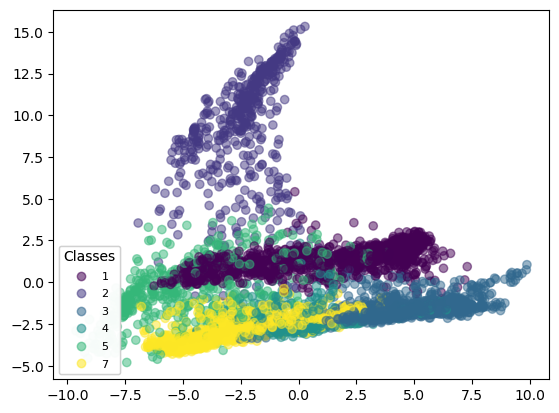

In [7]:
# Now, let's plot the projected data.
plot_data_projection(X_pca, y)